In [23]:
import numpy as np
import pandas as pd
import novosparc
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from skimage import morphology
import imageio
from myfunc import clip_background,cv2plot,set_borders_zero,resize_by_ratio,morph_line
%matplotlib inline

In [2]:
# draw ellipse
import math
def ellipselattice(cx, cy, a, b, theta):
    res = []
    myborder_res = []
    at = a * math.sin(theta)
    bt = b * math.cos(theta)
    Fi = math.atan2(at, bt)
    M = math.hypot(at, bt)
    ta = math.pi/2 - Fi
    tb = -math.pi/2 - Fi
    y0 = at * math.cos(ta) + bt *math.sin(ta)
    y1 = at * math.cos(tb) + bt *math.sin(tb)
    y0, y1 = math.ceil(cy + min(y0, y1)), math.floor(cy + max(y0, y1))
    for y  in range(y0, y1+1):
        t1 = math.asin(y / M) - Fi
        t2 = math.pi - math.asin(y / M) - Fi
        x1 = a * math.cos(t1) * math.cos(theta) - b* math.sin(t1) * math.sin(theta)
        x2 = a * math.cos(t2) * math.cos(theta) - b* math.sin(t2) * math.sin(theta)
        x1, x2 = math.ceil(cx + min(x1, x2)), math.floor(cx + max(x1, x2))
        line = [(x, y) for x in range(x1, x2 + 1)]
        myborder = [(x1,y),(x2,y)]
        res.append(line)
        myborder_res.append(myborder)
    return res,myborder_res

# ellipselattice(0, 0, 4, 3, math.pi)

### generate fake target space (location_3d) & epi (border_3d)

In [3]:
xmax = 60
ymax = 120
ymid = int(ymax/2)
print(xmax,ymax,ymid)

60 120 60


In [4]:
location_3d = []
border_3d = []
for i in range(6):
    slide = []
    slide_border = []
    a = int(xmax/2) - i*5
    b = int(ymax/2) - i*10
    ellipse,ellipse_boder = ellipselattice(0, 0, a, b, math.pi)
    # ellipse shape
    for item in ellipse:
        for subitem in item:
            slide.append((subitem[0],subitem[1],i*2))
            slide.append((subitem[0],subitem[1],-i*2))
    slide = np.asarray(slide)
    if i==0:
        slide_minx = min(slide[:,0])
        slide_miny = min(slide[:,1])
    slide[:,0] = slide[:,0]-slide_minx
    slide[:,1] = slide[:,1]-slide_miny    
    slide[:,2] = slide[:,2]+2*5
    location_3d.append(slide)
    # ellipse border
    for item in ellipse_boder:
        for subitem in item:
            slide_border.append((subitem[0],subitem[1],i*2))
            if i!=0:
                slide_border.append((subitem[0],subitem[1],-i*2))
    slide_border = np.asarray(slide_border)
    slide_border[:,0] = slide_border[:,0]-slide_minx
    slide_border[:,1] = slide_border[:,1]-slide_miny    
    slide_border[:,2] = slide_border[:,2]+2*5
    border_3d.append(slide_border)

In [5]:
slide_border

array([[30, 49, 20],
       [30, 49,  0],
       [29, 49, 20],
       [29, 49,  0],
       [28, 50, 20],
       [28, 50,  0],
       [32, 50, 20],
       [32, 50,  0],
       [27, 51, 20],
       [27, 51,  0],
       [32, 51, 20],
       [32, 51,  0],
       [27, 52, 20],
       [27, 52,  0],
       [33, 52, 20],
       [33, 52,  0],
       [26, 53, 20],
       [26, 53,  0],
       [34, 53, 20],
       [34, 53,  0],
       [26, 54, 20],
       [26, 54,  0],
       [34, 54, 20],
       [34, 54,  0],
       [26, 55, 20],
       [26, 55,  0],
       [34, 55, 20],
       [34, 55,  0],
       [26, 56, 20],
       [26, 56,  0],
       [34, 56, 20],
       [34, 56,  0],
       [26, 57, 20],
       [26, 57,  0],
       [34, 57, 20],
       [34, 57,  0],
       [26, 58, 20],
       [26, 58,  0],
       [34, 58, 20],
       [34, 58,  0],
       [25, 59, 20],
       [25, 59,  0],
       [35, 59, 20],
       [35, 59,  0],
       [26, 60, 20],
       [26, 60,  0],
       [34, 60, 20],
       [34, 6

In [6]:
target_loaction_3d = []
border_location_3d = []
for item in location_3d:
    for subitem in item:
        target_loaction_3d.append(subitem)
target_loaction_3d = np.asarray(target_loaction_3d)

for item in border_3d:
    for subitem in item:
        border_location_3d.append(subitem)
border_location_3d = np.asarray(border_location_3d)

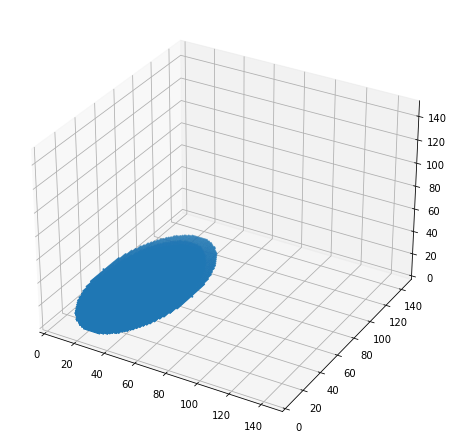

In [7]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlim([0,150])
ax.set_ylim([0,150])
ax.set_zlim([0,150])
x = target_loaction_3d[:,0]
y = target_loaction_3d[:,1]
z = target_loaction_3d[:,2]
ax.scatter(x,y,z,s=1)
plt.show()

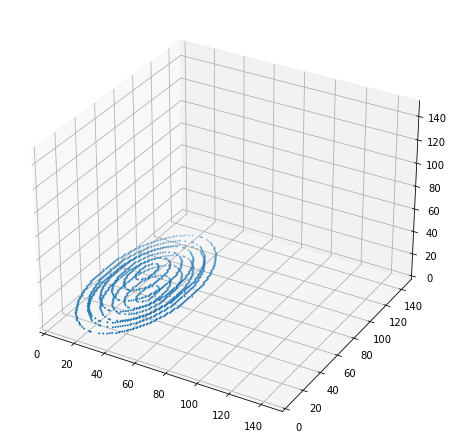

In [8]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlim([0,150])
ax.set_ylim([0,150])
ax.set_zlim([0,150])
x = border_location_3d[:,0]
y = border_location_3d[:,1]
z = border_location_3d[:,2]
ax.scatter(x,y,z,s=1)
plt.show()

In [9]:
print(target_loaction_3d.shape[0])

28460


In [10]:
zmax = np.max(target_loaction_3d[:,2])
zmin = np.min(target_loaction_3d[:,2])
print(zmax,zmin)

20 0


In [11]:
epi_atlas = np.zeros((target_loaction_3d.shape[0],1))
for i in range(target_loaction_3d.shape[0]):
    if i%2000 ==0:
        print(i)
    query = target_loaction_3d[i]
    if query[2]==zmax or query[2]==zmin:
        epi_atlas[i] = 1
        continue
    for item in border_location_3d:
        try:
            if np.all(query - item == 0):
                epi_atlas[i] = 1
                break
        except:
            print('err')

print(sum(epi_atlas),target_loaction_3d.shape[0],border_location_3d.shape[0])

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
[1888.] 28460 1462


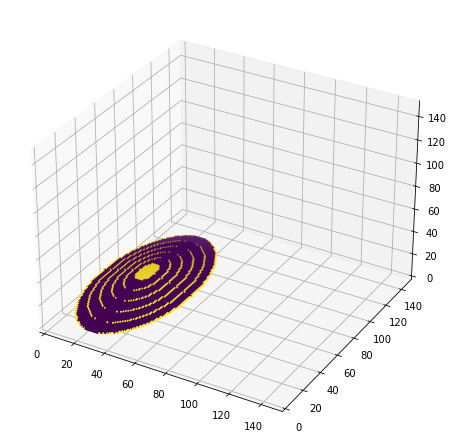

In [12]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlim([0,150])
ax.set_ylim([0,150])
ax.set_zlim([0,150])
x = target_loaction_3d[:,0]
y = target_loaction_3d[:,1]
z = target_loaction_3d[:,2]
ax.scatter(x,y,z,c=epi_atlas,s=1)
plt.show()

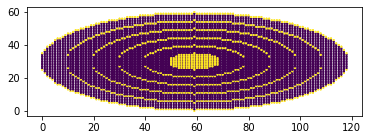

In [20]:
plt.figure(figsize=(6,2))
plt.scatter(target_loaction_3d[:, 1], target_loaction_3d[:, 0],c=epi_atlas,s=1)
plt.show()

In [13]:
np.save('raw/epi_33119_atlas',epi_atlas)
np.save('raw/fake_3d_tissue',target_loaction_3d)

### generate fake_??_4921

In [114]:
zmid = int(zmax/2)
zmid

10

In [115]:
mid_points = []
for i in range(target_loaction_3d.shape[0]):
    query = target_loaction_3d[i]
    if query[2]==zmid:
        mid_points.append(target_loaction_3d[i,0:2])   
mid_points = np.asarray(mid_points)
print(np.max(mid_points[:,0]),np.max(mid_points[:,1]),np.min(mid_points[:,0]),np.min(mid_points[:,1]))

60 118 0 0


In [116]:
old_loc = np.load('raw/myshape.npy')
old_atlas = pd.read_csv('raw/atlas.txt',sep='\t')
old_gene = old_atlas['SMED30004921'].to_numpy()
old_gene_points = old_loc[np.argwhere(old_gene!=0)].squeeze()
print(np.max(old_loc[:,0]),np.max(old_loc[:,1]))

174 478


In [117]:
old_gene_points[:,0] = [int(i*60/174) for i in old_gene_points[:,0]]
old_gene_points[:,1] = [int(i*118/478) for i in old_gene_points[:,1]]

In [118]:
len(old_gene_points[:,0])

5792

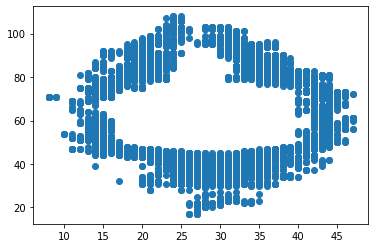

In [119]:
plt.scatter(old_gene_points[:,0],old_gene_points[:,1])

In [120]:
inner_atlas = np.zeros((target_loaction_3d.shape[0],1))

for i in range(target_loaction_3d.shape[0]):
    if i%2000 ==0:
        print(i)    
    query = target_loaction_3d[i]
    if query[2]!=zmid:
        continue
    for item in old_gene_points:
        try:
            if np.all(query[0:2] - item == 0):
                inner_atlas[i] = 1
                break
        except:
            print('err')     
print(sum(inner_atlas),target_loaction_3d.shape[0],old_gene_points.shape)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
[2040.] 28460 (5792, 2)


In [126]:
inner_atlas.shape

(28460, 1)

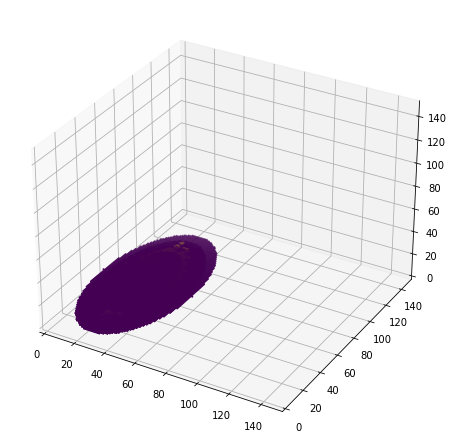

In [121]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlim([0,150])
ax.set_ylim([0,150])
ax.set_zlim([0,150])
x = target_loaction_3d[:,0]
y = target_loaction_3d[:,1]
z = target_loaction_3d[:,2]
ax.scatter(x,y,z,c=inner_atlas,s=1)
plt.show()

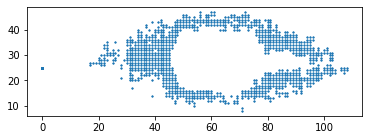

array([2040.])

In [130]:
inner_loc = np.where(inner_atlas!=0)
plt.figure(figsize=(6,2))
plt.scatter(target_loaction_3d[inner_loc, 1], target_loaction_3d[inner_loc, 0],s=1)
plt.show()
sum(inner_atlas)

In [127]:
np.save('raw/ukn_04921_atlas',inner_atlas)